# **Mounting Drive Content**

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!pip install tensorflow==2.2.0 keras==2.3.1

# **Importing the Library**

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
tf.__version__

'2.3.1'

In [5]:
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

|   0  GeForce GT 730     WDDM  | 00000000:01:00.0 N/A |                  N/A |


# **Image Data Exploration**

# **Leaf  Data**

In [6]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = 'input/train'
test_path = 'input/test'

# **Image Processing & Scaling**

In [7]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 390 images belonging to 13 classes.
Found 390 images belonging to 13 classes.


# **Deep Learning Model**

# **InceptionV3**

In [9]:
mob = InceptionV3(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
x1= Flatten()(mob.output)
prediction1 = Dense(13, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=500, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
13/13 [==============================] - 67s 5s/step - loss: 4.6516 - accuracy: 0.1282 - val_loss: 301.0000 - val_accuracy: 0.0385
Epoch 2/500
13/13 [==============================] - 67s 5s/step - loss: 2.3733 - accuracy: 0.3051 - val_loss: 61.9860 - val_accuracy: 0.0769
Epoch 3/500
13/13 [==============================] - 68s 5s/step - loss: 1.5650 - accuracy: 0.5692 - val_loss: 107.8523 - val_accuracy: 0.1051
Epoch 4/500
13/13 [==============================] - 68s 5s/step - loss: 1.0693 - accuracy: 0.7000 - val_loss: 20.6492 - val_accuracy: 0.1154
Epoch 5/500
13/13 [==============================] - 68s 5s/step - loss: 1.6510 - accuracy: 0.6308 - val_loss: 48871.3750 - val_accuracy: 0.0769
Epoch 6/500
13/13 [==============================] - 68s 5s/step - loss: 2.9685 - accuracy: 0.4718 - val_loss: 31277.9922 - val_accuracy: 0.0769
Epoch 7/500
13/13 [==============================] - 68s 5s/step

13/13 [==============================] - 65s 5s/step - loss: 0.0471 - accuracy: 0.9872 - val_loss: 1.1434 - val_accuracy: 0.8333
Epoch 114/500
13/13 [==============================] - 66s 5s/step - loss: 0.2175 - accuracy: 0.9513 - val_loss: 0.1985 - val_accuracy: 0.9667
Epoch 115/500
13/13 [==============================] - 65s 5s/step - loss: 0.0705 - accuracy: 0.9821 - val_loss: 1.0289 - val_accuracy: 0.8769
Epoch 116/500
13/13 [==============================] - 66s 5s/step - loss: 0.0666 - accuracy: 0.9744 - val_loss: 4.4523 - val_accuracy: 0.6308
Epoch 117/500
13/13 [==============================] - 65s 5s/step - loss: 0.4309 - accuracy: 0.9026 - val_loss: 12.9331 - val_accuracy: 0.8256
Epoch 118/500
13/13 [==============================] - 66s 5s/step - loss: 0.2699 - accuracy: 0.9231 - val_loss: 2.3174 - val_accuracy: 0.8641
Epoch 119/500
13/13 [==============================] - 66s 5s/step - loss: 0.1880 - accuracy: 0.9538 - val_loss: 6.3620 - val_accuracy: 0.4923
Epoch 120/50

13/13 [==============================] - 66s 5s/step - loss: 0.0749 - accuracy: 0.9769 - val_loss: 4.1365 - val_accuracy: 0.9051
Epoch 228/500
13/13 [==============================] - 66s 5s/step - loss: 0.0450 - accuracy: 0.9923 - val_loss: 3.6081 - val_accuracy: 0.9231
Epoch 229/500
13/13 [==============================] - 66s 5s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.5365 - val_accuracy: 0.9462
Epoch 230/500
13/13 [==============================] - 66s 5s/step - loss: 0.0188 - accuracy: 0.9923 - val_loss: 0.9242 - val_accuracy: 0.9590
Epoch 231/500
13/13 [==============================] - 66s 5s/step - loss: 0.0097 - accuracy: 0.9974 - val_loss: 0.4854 - val_accuracy: 0.9718
Epoch 232/500
13/13 [==============================] - 65s 5s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2964 - val_accuracy: 0.9769
Epoch 233/500
13/13 [==============================] - 66s 5s/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.2881 - val_accuracy: 0.9538
Epoch 234/500

13/13 [==============================] - 66s 5s/step - loss: 0.0900 - accuracy: 0.9795 - val_loss: 4.0558 - val_accuracy: 0.5077
Epoch 342/500
13/13 [==============================] - 66s 5s/step - loss: 0.0705 - accuracy: 0.9795 - val_loss: 3.2777 - val_accuracy: 0.5436
Epoch 343/500
13/13 [==============================] - 66s 5s/step - loss: 0.0674 - accuracy: 0.9821 - val_loss: 1.1410 - val_accuracy: 0.7641
Epoch 344/500
13/13 [==============================] - 66s 5s/step - loss: 0.0419 - accuracy: 0.9923 - val_loss: 0.4144 - val_accuracy: 0.8692
Epoch 345/500
13/13 [==============================] - 66s 5s/step - loss: 0.0186 - accuracy: 0.9949 - val_loss: 0.4841 - val_accuracy: 0.8769
Epoch 346/500
13/13 [==============================] - 66s 5s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.8795
Epoch 347/500
13/13 [==============================] - 66s 5s/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.4027 - val_accuracy: 0.9000
Epoch 348/500

13/13 [==============================] - 67s 5s/step - loss: 0.0935 - accuracy: 0.9692 - val_loss: 1.2135 - val_accuracy: 0.7205
Epoch 456/500
13/13 [==============================] - 66s 5s/step - loss: 0.0534 - accuracy: 0.9769 - val_loss: 1.3929 - val_accuracy: 0.7769
Epoch 457/500
13/13 [==============================] - 67s 5s/step - loss: 0.1558 - accuracy: 0.9590 - val_loss: 6.0411 - val_accuracy: 0.6051
Epoch 458/500
13/13 [==============================] - 66s 5s/step - loss: 0.3034 - accuracy: 0.9385 - val_loss: 25.3554 - val_accuracy: 0.2410
Epoch 459/500
13/13 [==============================] - 67s 5s/step - loss: 0.3367 - accuracy: 0.9359 - val_loss: 13.8680 - val_accuracy: 0.4333
Epoch 460/500
13/13 [==============================] - 67s 5s/step - loss: 0.6181 - accuracy: 0.8744 - val_loss: 5.8411 - val_accuracy: 0.5667
Epoch 461/500
13/13 [==============================] - 66s 5s/step - loss: 0.2354 - accuracy: 0.9359 - val_loss: 4.7825 - val_accuracy: 0.6564
Epoch 462/5

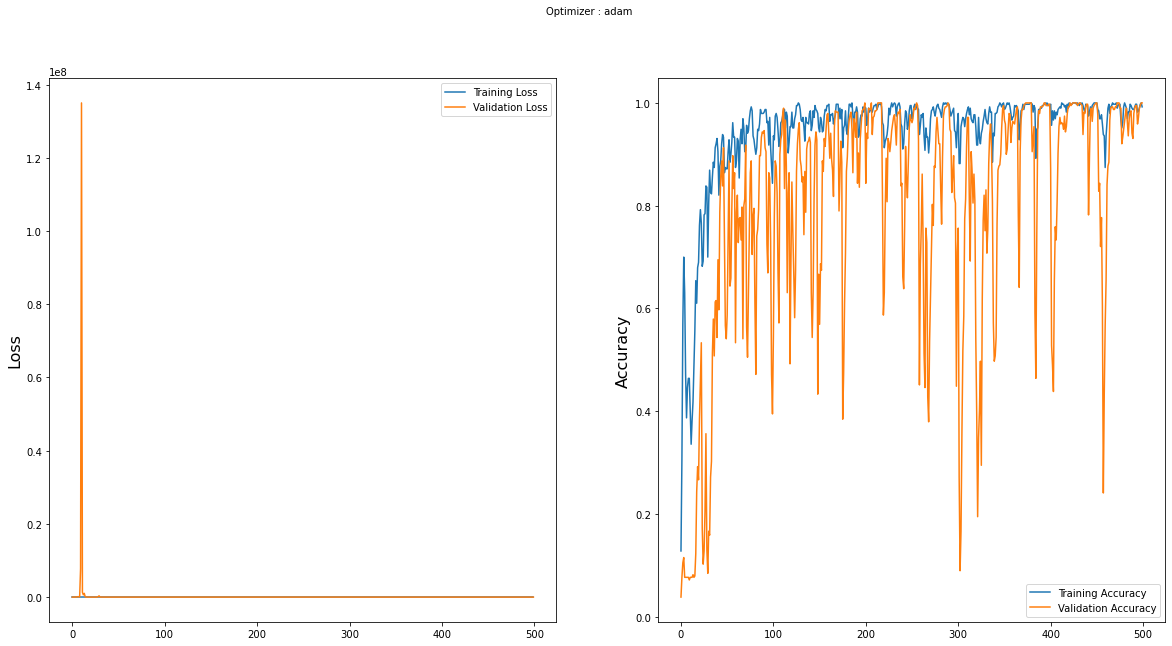

In [12]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **InceptionResNetV2**

In [18]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
x31 = Flatten()(inc.output)
predictionss = Dense(13, activation='softmax')(x31)

In [20]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_297 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_297 (BatchN (None, 111, 111, 32) 96          conv2d_297[0][0]                 
__________________________________________________________________________________________________
activation_297 (Activation)     (None, 111, 111, 32) 0           batch_normalization_297[0][0]    
_______________________________________________________________________________________

conv2d_444 (Conv2D)             (None, 12, 12, 192)  215040      activation_443[0][0]             
__________________________________________________________________________________________________
batch_normalization_441 (BatchN (None, 12, 12, 192)  576         conv2d_441[0][0]                 
__________________________________________________________________________________________________
batch_normalization_444 (BatchN (None, 12, 12, 192)  576         conv2d_444[0][0]                 
__________________________________________________________________________________________________
activation_441 (Activation)     (None, 12, 12, 192)  0           batch_normalization_441[0][0]    
__________________________________________________________________________________________________
activation_444 (Activation)     (None, 12, 12, 192)  0           batch_normalization_444[0][0]    
__________________________________________________________________________________________________
block17_18

In [21]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=100, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/100
13/13 [==============================] - 147s 11s/step - loss: 4.4601 - accuracy: 0.1923 - val_loss: 121.9990 - val_accuracy: 0.0949
Epoch 2/100
13/13 [==============================] - 145s 11s/step - loss: 2.1440 - accuracy: 0.5154 - val_loss: 290.2662 - val_accuracy: 0.0897
Epoch 3/100
13/13 [==============================] - 144s 11s/step - loss: 1.0410 - accuracy: 0.7308 - val_loss: 183.0691 - val_accuracy: 0.0718
Epoch 4/100
13/13 [==============================] - 143s 11s/step - loss: 0.7029 - accuracy: 0.8462 - val_loss: 39.2410 - val_accuracy: 0.0769
Epoch 5/100
13/13 [==============================] - 152s 12s/step - loss: 0.6880 - accuracy: 0.8641 - val_loss: 7.8244 - val_accuracy: 0.1897
Epoch 6/100
13/13 [==============================] - 143s 11s/step - loss: 0.3978 - accuracy: 0.9026 - val_loss: 3.0033 - val_accuracy: 0.4385
Epoch 7/100
13/13 [==============================] - 156s 12s/step - loss: 0.2962 - accuracy: 0.9462 - val_loss: 17.6522 - val_accuracy

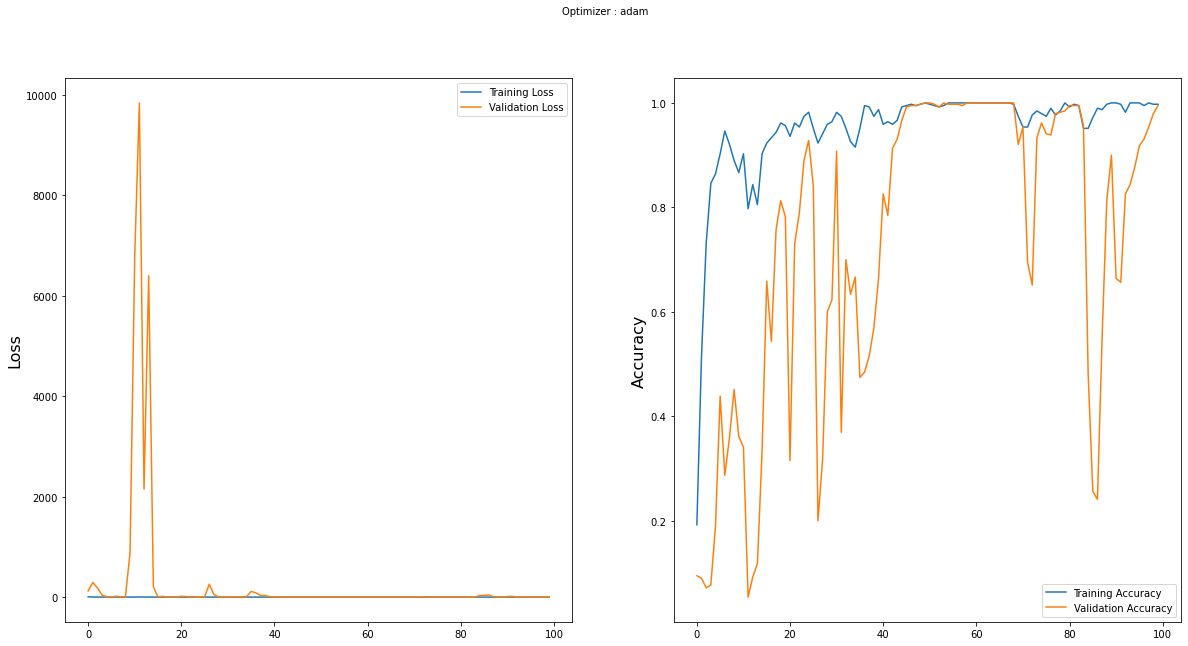

In [22]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Model Saving For Leaf Disease**

In [23]:
modelss.save('model.h5')

In [24]:
model12.save('model12.h5')